# 1. GIS
- GIS(Geospatial Information System)란, 우리가 흔히 하는 데이터가 위치에 대한 정보를 갖고 있는 것이라고 할수 있다.
- 이는 도시의 건축물 좌표(Point), 도로(Line), 시군구 법정동에 해당하는 영역(Polygon)이 될수 있다.
    - 도시 공간이라는 것은 단순히 수치적으로 파악하는 것 외에도, 지리적 위치에 따라 다른 시각으로 접근할 수 있기 때문에 공간데이터를 이해하는 것이 상당히 중요하다.
    
# 2. GIS data
- 이렇게 위치정보를 포함하고 있는 데이터는 크게 Vector와 Raster가 있다.
- Raster는 우리가 흔히 아는 이미지 형태의 데이터이고, 
- Vector는 대표적인 세가지 유형의 데이터가 있다.
    1. Point(점): 주로 어떤 도시기반시설, 건물, 교차로(node) 등을 나타낼 때 사용한다.
    2. Line(선): 주로 도로, 경로, 네트워크, 어떤 면의 중심선, 철도 등을 나타낼 때 사용한다.
    3. Polygon(다각형): 주로 어떤 지역, 군 영역 등을 나타낼 때 사용한다.
    
# 3. GeoPandas
- GeoPandas는 Pandas와 유사한 라이브러리로, 공간정보를 가진 데이터프레임을 다루는데 유용한 패키지로 가장 많이 활용된다.
- Pandas와 마찬가지로 `GeoSeries`, `GeoDataFrame`의 타입으로 다루며 function이나 attribute들도 큰 차이가 없다.

## 3_1 공간데이터 생성
- GeoPandas는 내부적으로 `shapely`라는 패키지를 사용하여 공간 정보를 처리한다.
- 이 패키지에는 위에서 말했던 세가지 Vector 타입이 있으며, 추가적으로 MultiPolygon, MultiLinestring등의 타입들이 있다.

In [1]:
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point

다음과 같이 xy평면에 4개의 좌표를 정의해보자

In [2]:
x1, y1 = 1, 2
x2, y2 = 2, 2
x3, y3 = 2, 3
x4, y4 = 1, 3

점은 1개의 좌표, 선은 2개, 다각형은 3개 이상의 좌표가 필요하며 다음과 같이 생성할 수 있다.

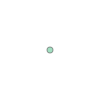

In [3]:
Point([x1, y1])

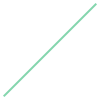

In [4]:
LineString([(x1, y1), (x3, y3)])

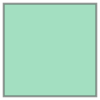

In [5]:
Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)])

여기서 주의할 점은 Polygon의 좌표들에는 순서가 존재한다는 것이다.

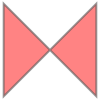

In [6]:
Polygon(sorted([(x1, y1), (x2, y2), (x3, y3), (x4, y4)]))

이렇게 `shapely`를 활용하여 생성한 공간 데이터를 시각화할 때는 `GeoPandas`를 사용하면 쉽게 그릴 수 있다.

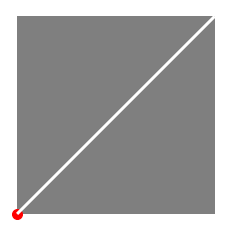

Point
LineString
Polygon


In [7]:
import matplotlib.pyplot as plt

point = Point([x1,y1])
line = LineString([(x1, y1), (x3, y3)])
polygon = Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)])

ax = gpd.GeoSeries(polygon).plot( color = 'black', alpha=0.5)
gpd.GeoSeries(line).plot(ax=ax, linewidth=3, color='white')
gpd.GeoSeries(point).plot(ax=ax, color='red', markersize=100)
plt.axis('off')
plt.show();
print(point.geom_type)
print(line.geom_type)
print(polygon.geom_type)

# 4 외부데이터 활용
## 4_1 공간데이터의 형태
- Point 좌표 데이터의 경우 csv 파일로 서울시 소방안전센터의 경도와 위도 좌표를 가지고 있다.
- Polygon의 경우 GIS 데이터는 shapefile이라고 하는데 이는 하나의 파일이 아니라 3개 이상의 확장포맷을 통틀어 부른다.
    - `dbf`, `prj`, `shp`, `shx`의 확장자를 가지고 있다.
    - 이 4개의 파일은 각자의 공간정보를 담고 있어, 개별파일이 아니라 한 경로에 같이 보관되어야 한다.
    - **dbf**: dBase 데이터베이서 파일로, 데이터프레임 형태의 정보를 갖고 있다.
    - **prj**: 공간 데이터의 좌표정보(좌표계)를 갖고 있으며, 좌표정의가 되어 있지 않을 경우 이 파일이 없을 수도 있다.
    - **shp**: vector 타입의 도형 및 정보를 담고 있다.
    - **shx**: shp와 마찬자기이며, Auto CAD에서 주로 활용한다.

## 4_2 공간데이터 시각화

In [8]:
import pandas as pd

seoul_area = gpd.GeoDataFrame.from_file('./data/LARD_ADM_SECT_SGG_11.shp', 
                                        encoding='cp949')
pt_119 = pd.read_csv('./data/서울시 안전센터관할 위치정보 (좌표계_ WGS1984).csv', 
                     encoding='cp949',
                     dtype=str)

In [9]:
seoul_area.head(3)

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1..."
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1..."
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1..."


In [10]:
pt_119.head(3)

,고유번호,센터ID,센터명,위도,경도
0,21,1121101,양천119안전센터,37.527161,126.8694519
1,22,1122101,신내119안전센터,37.6102463,127.0964731
2,42,1115104,서초119안전센터,37.4877727,127.0171447


- shp 파일을 GeoPandas를 이용해서 바로 읽었을때, Geometry 컬럼에 각 구에 해당하는 Polygon 정보가 들어있는 것을 확인할 수 있다.
- 하지만 소방안전센터의 경우 단순 데이터프레임이므로 위도와 경도 좌표를 이용해서 공간데이터로 만들어 주어야 한다.

In [11]:
pt_119['경도'] = pt_119['경도'].astype(float)
pt_119['위도'] = pt_119['위도'].astype(float)
pt_119['geometry'] = pt_119.apply(lambda row: Point([row['경도'], row['위도']]), axis=1)
pt_119 = gpd.GeoDataFrame(pt_119, geometry='geometry')

pt_119.head(3)

,고유번호,센터ID,센터명,위도,경도,geometry
0,21,1121101,양천119안전센터,37.527161,126.869452,POINT (126.86945 37.52716)
1,22,1122101,신내119안전센터,37.610246,127.096473,POINT (127.09647 37.61025)
2,42,1115104,서초119안전센터,37.487773,127.017145,POINT (127.01714 37.48777)


In [12]:
pt_119.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   고유번호      117 non-null    object  
 1   센터ID      117 non-null    object  
 2   센터명       117 non-null    object  
 3   위도        117 non-null    float64 
 4   경도        117 non-null    float64 
 5   geometry  117 non-null    geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 5.6+ KB


## 4_3 좌표 정의 및 변환
- 공간데이터를 다룰 때는 좌표계를 이해하는 것이 상당히 중요하다.
- 서로 다른 데이터의 좌표계를 통일시키거나 변환할때는, 먼저 해당 데이터가 정의된 좌표계가 어떤 것인지 알아야 한다.
- 대표적으로 위경도, 미터좌표계가 있는데 국내에서는 주로 아래 좌표계를 사용한다.
    1. EPSG4326(WGS84): 위경도, 기본 좌표계
    2. EPSG5179(TM): 미터 좌표계
    3. EPSG5174(TM): 미터 좌표계
    4. EPSG5181(TM): 미터 좌표계
    
<br>

- 데이터를 받아올때 꼭 어떤 좌표계로 만들어진 데이터 인지를 확인해야 그 데이터를 활용할 수 있다.(좌표계를 모르면 못쓰는 데이터라고 해도 무방하다)
- 기본적으로 Python이나 QGIS에 내장된 각 좌표계를 사용해도 큰 문제는 없지만 보정좌표 등을 정확하게 정의해주기 위해서는 직접 해당 좌표계를 정의해주는 게 좋다.

<br>

- 좌표계 확인 및 정의는 `.crs`인자로, 변환은 `.to_crs`인자로 가능하다.

In [13]:
print(seoul_area.crs)
print(pt_119.crs)

epsg:5179
None


보다시피 새로 생성한 pt_119는 아직 좌표정의가 되어 있지 않다.  
파일명처럼 좌표계는 기본 위경도 좌표인 EPSG4326 좌표계라고 명시되어 있으므로 다음과 같이 정의해주자

In [14]:
pt_119.crs = {'init':'epsg:4326'}
print(pt_119.crs)

+init=epsg:4326 +type=crs


C:\Users\Jun\anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


두 데이터 모두 좌표가 정의 되었으므로, 이제 하나의 좌표로 통일시켜보자  
일반적으로 미터 단위를 분석을 진행해야 하기 때문에 `epsg5179`로 변환해주자

In [15]:
pt_119 = pt_119.to_crs({'init':'epsg:5179'})
print(pt_119.crs)
pt_119.head(3)

+init=epsg:5179 +type=crs


,고유번호,센터ID,센터명,위도,경도,geometry
0,21,1121101,양천119안전센터,37.527161,126.869452,POINT (944285.708 1947726.391)
1,22,1122101,신내119안전센터,37.610246,127.096473,POINT (964384.657 1956833.993)
2,42,1115104,서초119안전센터,37.487773,127.017145,POINT (957313.294 1943279.263)


In [16]:
pt_119.tail()

,고유번호,센터ID,센터명,위도,경도,geometry
112,117,1105105,금호119안전센터,37.545841,127.024530,POINT (957998.796 1949718.266)
113,106,1114401,삼성119안전센터,37.510765,127.056252,POINT (960782.611 1945813.139)
114,107,1114103,영동119안전센터,37.520161,127.027564,POINT (958252.454 1946867.912)
115,108,1111105,수락119안전센터,37.675376,127.066846,POINT (961803.081 1964071.479)
116,109,1119104,구로119안전센터,37.496988,126.887320,POINT (945842.715 1944368.416)


In [17]:
seoul_area.head(3)

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1..."
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1..."
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1..."


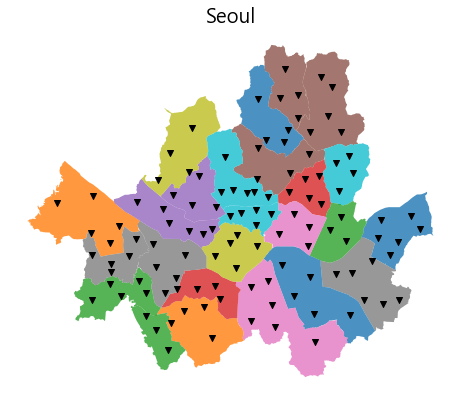

In [18]:
ax = seoul_area.plot(column="SGG_NM", figsize=(8,8), alpha=0.8)
pt_119.plot(ax=ax, marker='v', color='black', label='Firestation')
ax.set_title("Seoul", fontsize=20)
ax.set_axis_off()
# plt.legend()
plt.show()

출처: [yg's blog](https://yganalyst.github.io/spatial_analysis/spatial_analysis_1/)